In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\Harpreet\Desktop\\Jupyter_Files\\Black_Friday_Analysis\\BlackFriday.csv")

del df['Product_Category_2']
del df['Product_Category_3']
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [3]:
df.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

<Axes: title={'center': 'Age-Density Graph'}, xlabel='Age'>

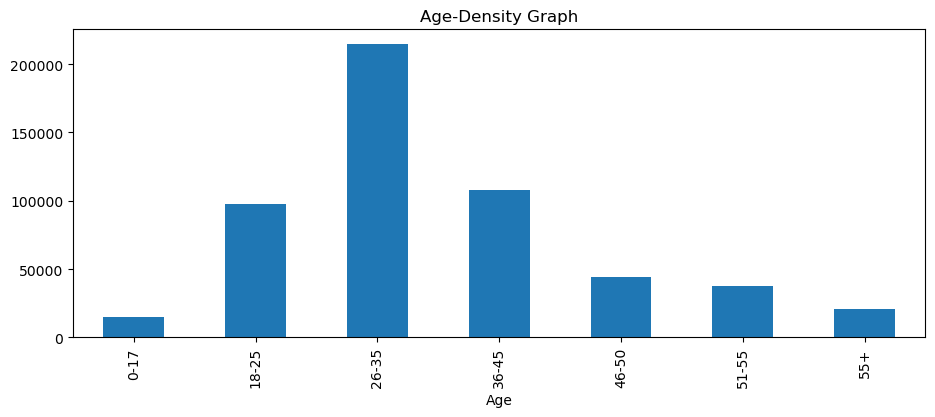

In [4]:
df.groupby('Age').size().plot(kind='bar',title='Age-Density Graph',figsize=(11,4))

In [5]:
lst = []
for i in df['Age'].unique():
    lst.append([i, df[df['Age'] == i]['Product_ID'].nunique()])
print(lst)    
data = pd.DataFrame(lst , columns = ['Age','Products'])

[['0-17', 2300], ['55+', 2573], ['26-35', 3419], ['46-50', 3099], ['51-55', 2877], ['36-45', 3318], ['18-25', 3213]]


<Axes: xlabel='Age'>

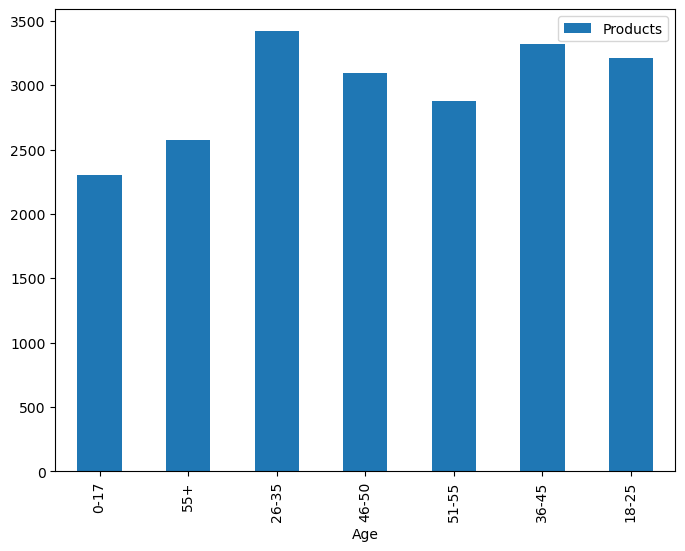

In [6]:
data.plot.bar(x = 'Age', figsize = (8,6))

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

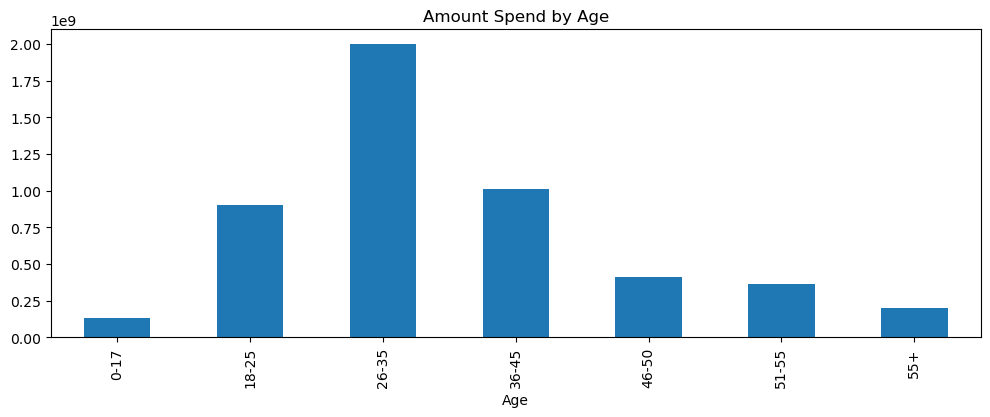

In [7]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (12, 4), title = 'Amount Spend by Age')

In [8]:
df.groupby('Age').mean()['Purchase']

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')

# Handle missing values (e.g., by filling with 0 or dropping them)
df = df.dropna(subset=['Purchase'])

# Group by 'Age' and calculate the mean of 'Purchase' column
age_purchase_mean = df.groupby('Age').mean()['Purchase']

# Plot the bar chart
age_purchase_mean.plot(kind='bar', figsize=(12, 6), title='Amount Spend by Age')

# Show the plot
plt.show()

In [ ]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%0.1f')